In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from seaborn import tsplot
import statsmodels
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import probplot

from statsmodels.tsa.arima_model import ARIMA

In [17]:
#data = pd.read_csv('stock/AAPL.csv', index_col = 0)
data = pd.read_csv('stock/KO.csv', index_col = 0)
#data = pd.read_csv('stock/GS.csv', index_col = 0)
#data = pd.read_csv('stock/HD.csv', index_col = 0)
#data = pd.read_csv('stock/JNJ.csv', index_col = 0)
#data = pd.read_csv('stock/WMT.csv', index_col = 0)




data['log_return'] = 0
dates = data.index
for i,date in enumerate(dates[1:]):
    close = data.loc[date, 'close']
    prev_close = data.loc[dates[i],'close']
    data.loc[date, 'log_return'] = 100*np.log(close/prev_close)
    
    
    
y_t=data['log_return'].tolist()#log return
#proxy = [pow((y_t[i] - sum(y_t)/len(y_t)),2) for i in range(len(y_t))]#volitility of log return
proxy = np.log([pow((y_t[i] - sum(y_t)/len(y_t)),2) for i in range(len(y_t))])



train_size = int(len(y_t)*0.8)
train_X, train_y, train_dates = y_t[:train_size], proxy[:train_size],dates[:train_size]
test_X, test_y, test_dates = y_t[train_size:], proxy[train_size:], dates[train_size:]




In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def eva(a,b):
    mse = mean_squared_error(a,b)
    rmse=np.sqrt(mse)
    mae = mean_absolute_error(a,b)
    return rmse,mse,mae




# ARIMA

In [19]:
from statsmodels.tsa.arima_model import ARIMA

def find_best_arimamodel(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    pq_rng = range(6) 
    d_rng = range(2) 
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    tmp_order=(i,d,j)
                    print('aic: {:6.2f} | order: {}'.format(tmp_aic, tmp_order))
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl


res_tup = find_best_arimamodel(train_X)

aic: 2580.88 | order: (0, 0, 1)
aic: 2579.43 | order: (0, 0, 2)
aic: 2581.29 | order: (0, 0, 3)
aic: 2582.65 | order: (0, 0, 4)
aic: 2584.17 | order: (0, 0, 5)
aic: 2585.95 | order: (0, 1, 1)
aic: 2587.67 | order: (0, 1, 2)
aic: 2580.91 | order: (1, 0, 0)
aic: 3019.29 | order: (1, 1, 0)
aic: 2587.70 | order: (1, 1, 1)
aic: 2586.35 | order: (1, 1, 2)
aic: 2588.19 | order: (1, 1, 3)
aic: 2588.86 | order: (1, 1, 4)
aic: 2590.85 | order: (1, 1, 5)
aic: 2579.29 | order: (2, 0, 0)
aic: 2581.22 | order: (2, 0, 1)
aic: 2576.46 | order: (2, 0, 2)
aic: 2878.16 | order: (2, 1, 0)
aic: 2586.14 | order: (2, 1, 1)
aic: 2588.21 | order: (2, 1, 2)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


aic: 2590.29 | order: (2, 1, 3)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


aic: 2592.27 | order: (2, 1, 4)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


aic: 2589.76 | order: (2, 1, 5)
aic: 2581.16 | order: (3, 0, 0)
aic: 2582.91 | order: (3, 0, 1)
aic: 2581.44 | order: (3, 0, 2)
aic: 2798.80 | order: (3, 1, 0)
aic: 2588.00 | order: (3, 1, 1)
aic: 2588.71 | order: (3, 1, 2)
aic: 2591.26 | order: (3, 1, 3)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


aic: 2589.04 | order: (3, 1, 4)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


aic: 2592.91 | order: (3, 1, 5)
aic: 2582.37 | order: (4, 0, 0)
aic: 2584.30 | order: (4, 0, 1)
aic: 2572.27 | order: (4, 0, 2)
aic: 2574.29 | order: (4, 0, 3)
aic: 2754.33 | order: (4, 1, 0)
aic: 2589.18 | order: (4, 1, 1)
aic: 2590.70 | order: (4, 1, 2)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


aic: 2590.55 | order: (4, 1, 3)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


aic: 2590.77 | order: (4, 1, 4)


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


aic: 2591.60 | order: (4, 1, 5)
aic: 2583.99 | order: (5, 0, 0)
aic: 2583.57 | order: (5, 0, 1)
aic: 2585.79 | order: (5, 0, 2)
aic: 2576.27 | order: (5, 0, 3)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


aic: 2586.29 | order: (5, 0, 4)
aic: 2744.14 | order: (5, 1, 0)
aic: 2590.77 | order: (5, 1, 1)
aic: 2590.36 | order: (5, 1, 2)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


aic: 2590.80 | order: (5, 1, 3)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


aic: 2594.09 | order: (5, 1, 4)
aic: 2599.56 | order: (5, 1, 5)
aic: 2572.27 | order: (4, 0, 2)


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [20]:
#best_order=res_tup[1]
best_order=[4,0,2]
best_arima_model=ARIMA(train_X, order=(4,0,2)).fit(
                        method='mle', trend='nc'
                    )
#best_arima_model.summary()

In [21]:
#recursive forecast
#时间长！！！！
k=best_order[0]
d=best_order[1]
j=best_order[2]

#f=best_arima_model.forecast()[0]
#tempX=train_X
arima_fore=[]

for i in range(len(train_X),len(y_t)):
    #tempX.append(test_X[i-1])
    pred_arima=ARIMA(y_t[0:i], order=(k,d,j)).fit(method='mle', trend='nc')#0-841 0-1256
    f=pred_arima.forecast()[0]
    #arima_fore[i-len(train_X)]=f #0/842data-415/1257data
    arima_fore.append(f)

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [22]:
f_in=best_arima_model.predict(start=0,end=len(train_X)-1)
fin_index=np.linspace(0, len(train_X)-1, num=len(train_X))
fout_index=np.linspace(len(train_X), len(y_t)-1, num=len(test_X))

Text(0.5, 1.0, 'ARIMA estimation and prediction of log return')

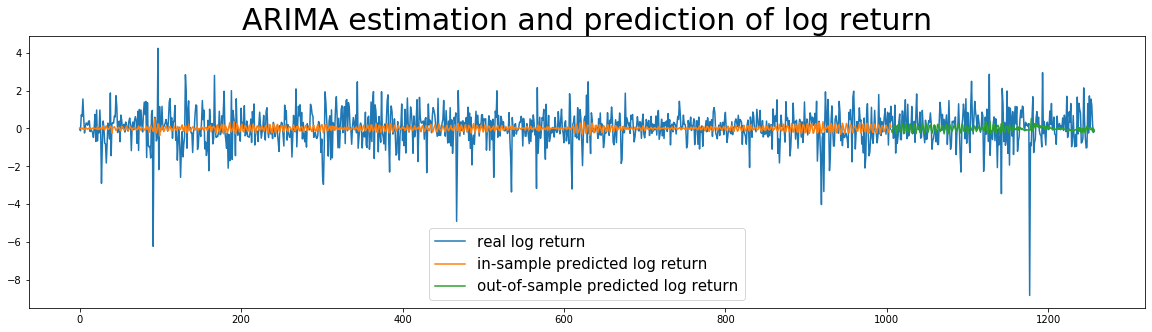

In [23]:
plt.figure(figsize = (20,5))
plt.plot(y_t,label='real log return')
plt.plot(fin_index,f_in,label='in-sample predicted log return')
plt.plot(fout_index,arima_fore,label='out-of-sample predicted log return')
plt.legend(loc='best', fontsize=15)
plt.title('ARIMA estimation and prediction of log return',fontsize=30)

(0, 20)

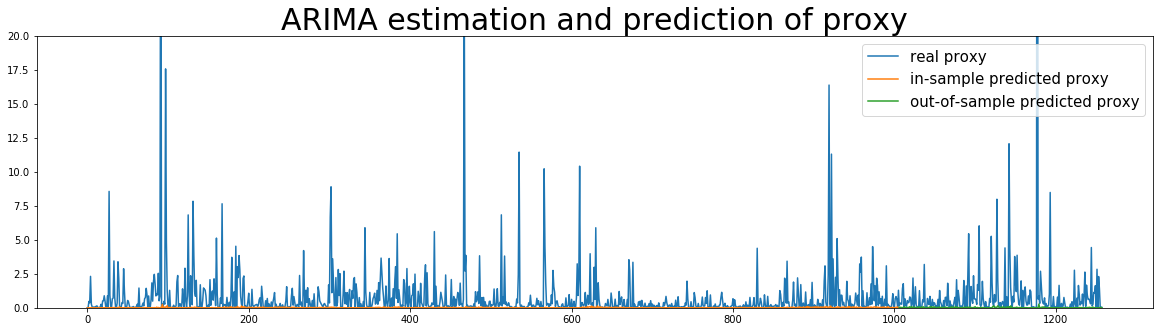

In [24]:
plt.figure(figsize = (20,5))

s=y_t
proxy_true=[pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))]
plt.plot(proxy_true,label='real proxy')

s=f_in
proxy_in=[pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))]
plt.plot(fin_index,proxy_in,label='in-sample predicted proxy')

s=arima_fore
proxy_out=[pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))]
plt.plot(fout_index,proxy_out,label='out-of-sample predicted proxy')
plt.legend(loc='best', fontsize=15)
plt.title('ARIMA estimation and prediction of proxy',fontsize=30)

axes = plt.gca()
#axes.set_xlim([1180,1200])
axes.set_ylim([0,20])

Text(0.5, 1.0, 'ARIMA estimation and prediction of log(proxy)')

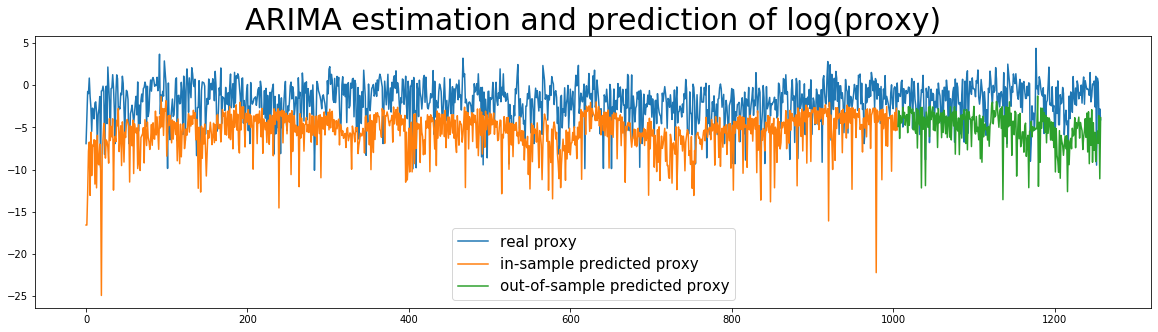

In [25]:
plt.figure(figsize = (20,5))

s=y_t
proxy_true=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(proxy_true,label='real proxy')

s=f_in
proxy_in=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(fin_index,proxy_in,label='in-sample predicted proxy')

s=arima_fore
proxy_out=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(fout_index,proxy_out,label='out-of-sample predicted proxy')
plt.legend(loc='best', fontsize=15)
plt.title('ARIMA estimation and prediction of log(proxy)',fontsize=30)

#The predicted proxy for volatility are far too small that the log of it are mostly negative as in the plot.
#ARIMA cannot 

In [26]:
s=train_X
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

s=f_in
proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))


s=test_X
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

s=arima_fore
proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))
#这个是ARIMA 预测的logreturn计算volitility 得到rmse

(4.8902819631990875, 23.91485767959032, 4.075596977627549)
(4.715336066417403, 22.234394219256743, 3.9972402489061483)


# ARIMA residuals log return dis

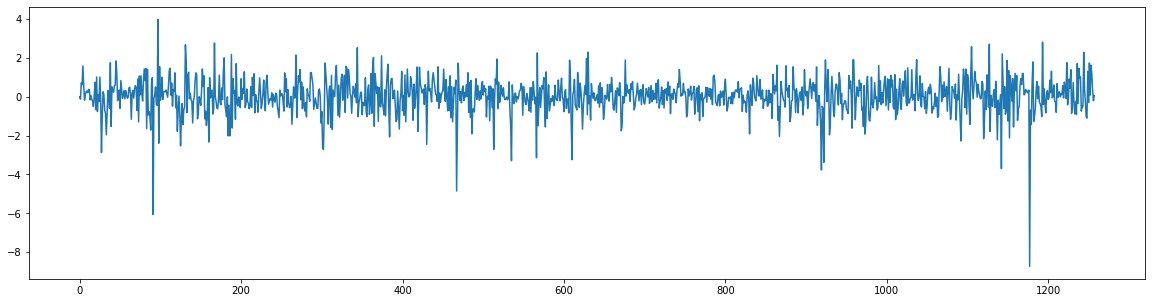

In [27]:
#test_X=np.asarray(test_X)
arima_fore=np.asarray(arima_fore)

arima_resid_out=(test_X-arima_fore).tolist()
arima_resid_in=(train_X-f_in).tolist()

arima_resid_full=(train_X-f_in).tolist()

for i in range(len(test_X)):
    arima_resid_full.append(arima_resid_out[i])
    
plt.figure(figsize = (20,5))
plt.plot(arima_resid_full)

In [28]:
from scipy.stats import kurtosis
kurtosis(arima_resid_full)
#kurtosis(y_t)
#大于3, heavy tail, StudentsT
#小于3，Normal

9.997134281389513

10.386012912838043


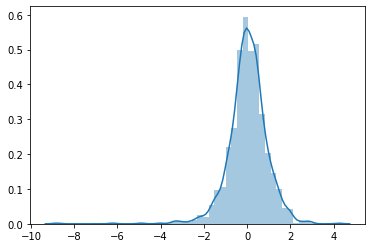

In [29]:
import seaborn as sns
import statistics
sns.distplot(y_t) 
#statistics.mean(res)
print(kurtosis(y_t))
#assume log return follows a N(miu,sigma^2)

# GARCH 

## GARCH ON log return

In [30]:
from arch import arch_model

def find_best_garchmodel(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    pq_rng = range(5) 
    d = 0
    for i in pq_rng:
        for j in pq_rng:
            try:
                tmp_mdl = arch_model(TS, p=i,o=d,q=j,vol='Garch',dist='StudentsT').fit(disp='off')
                tmp_aic = tmp_mdl.aic
                tmp_order=(i,d,j)
                print('aic: {:6.2f} | order: {}'.format(tmp_aic, tmp_order))
                if tmp_aic < best_aic:
                    best_aic = tmp_aic                        
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl




In [31]:
garch_tup=find_best_garchmodel(train_X)
best_order_full=garch_tup[1]
best_garch_full=garch_tup[2]
#best_resgarch=arch_model(best_arima_model.resid, p=1,o=0,q=2,vol='Garch',dist='StudentsT').fit(disp='off')
#print(best_resgarch.summary())

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7583. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7583. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

aic: 2408.69 | order: (1, 0, 0)
aic: 2396.85 | order: (1, 0, 1)
aic: 2396.23 | order: (1, 0, 2)
aic: 2399.34 | order: (1, 0, 3)
aic: 2394.10 | order: (1, 0, 4)
aic: 2403.29 | order: (2, 0, 0)
aic: 2398.85 | order: (2, 0, 1)


//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7583. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7583. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

aic: 2397.94 | order: (2, 0, 2)
aic: 2399.94 | order: (2, 0, 3)
aic: 2396.10 | order: (2, 0, 4)
aic: 2402.48 | order: (3, 0, 0)
aic: 2400.85 | order: (3, 0, 1)
aic: 2399.94 | order: (3, 0, 2)


//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7583. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7583. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

aic: 2403.34 | order: (3, 0, 3)
aic: 2398.90 | order: (3, 0, 4)
aic: 2404.42 | order: (4, 0, 0)
aic: 2402.85 | order: (4, 0, 1)
aic: 2401.94 | order: (4, 0, 2)
aic: 2405.34 | order: (4, 0, 3)
aic: 2400.90 | order: (4, 0, 4)
aic: 2394.10 | order: (1, 0, 4)


//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7583. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7583. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


In [32]:
#train_X=y_t[:train_size]

garch_var_full = np.zeros(len(test_X)) 
garch_mean_full = np.zeros(len(test_X)) 

pred_model=arch_model(y_t, p=best_order_full[0],o=best_order_full[1],
                      q=best_order_full[2],vol='Garch',dist='StudentsT')


for i in range(len(test_X)):
    #print(i)
    res = pred_model.fit(last_obs=len(train_X)+i, disp='off')#1257th 前面都是na #842-1257
    temp = res.forecast(horizon=1).variance #conditional sigmasq
    temp2 = res.forecast(horizon=1).mean #conditional mean
    #print(temp.iloc[-5:])
    garch_var_full[i] = temp.iloc[i + len(train_X)-1]#the first var is the last train var
    garch_mean_full[i]=temp2.iloc[-1] 
    
#garch_var_res[len(test_X)]=pred_model.fit(disp='off').forecast(horizon=1).variance.iloc[-1]
#garch_mean_res[len(test_X)]=pred_model.fit(disp='off').forecast(horizon=1).mean.iloc[-1]
vardf_full=pd.DataFrame(garch_var_full)#last train var - last test var

#print(vardf)

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7583. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7577. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7542. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.755. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7499. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7492. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7419. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.742. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7392. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7387. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7429. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7429. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7447. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7441. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.754. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.754. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning:

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7719. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7724. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8353. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8351. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8332. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8326. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8244. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8238. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8259. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8254. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

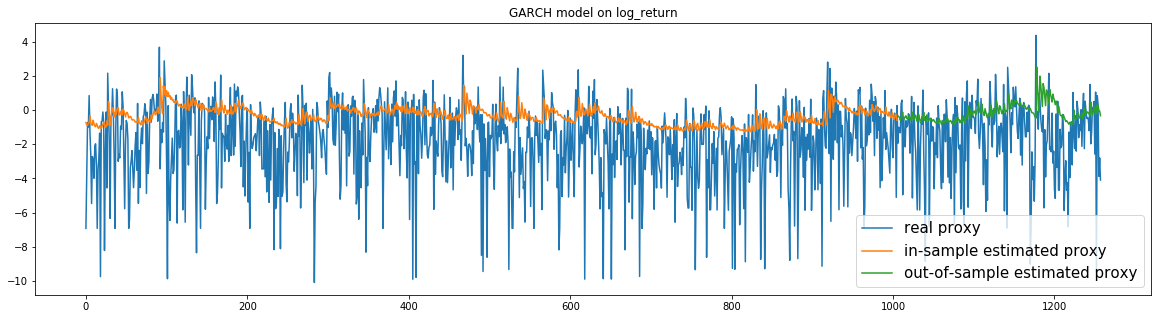

In [33]:
plt.figure(figsize = (20,5))

s=y_t
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(proxy0,label='real proxy')#real


plt.plot(np.log(best_garch_full.conditional_volatility**2),label='in-sample estimated proxy')


fout_index=np.linspace(len(train_X), len(y_t)-1, num=len(test_X))
plt.plot(fout_index,np.log(vardf_full),label='out-of-sample estimated proxy')


plt.legend(loc='best', fontsize=15)
plt.title('GARCH model on log_return')
axes = plt.gca()
#axes.set_xlim([1180,1200])
#axes.set_ylim([0,5])

In [34]:
s=train_X
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

proxy00=np.log(best_garch_full.conditional_volatility**2)
#proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))


s=test_X
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

proxy00=np.log(vardf_full)
#proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))
#这个是ARIMA 预测的logreturn计算volitility 得到rmse

(2.93579730922305, 8.618905840841299, 2.0640886540393373)
(2.703367331960406, 7.308194931510724, 1.9185180009869198)


## GARCH ON ARIMA RESIDUALS

In [35]:
garch_tup=find_best_garchmodel(arima_resid_in)
best_order_res=garch_tup[1]
best_garch_res=garch_tup[2]
#best_resgarch=arch_model(best_arima_model.resid, p=1,o=0,q=2,vol='Garch',dist='StudentsT').fit(disp='off')
#print(best_resgarch.summary())

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

aic: 2390.42 | order: (1, 0, 0)
aic: 2385.63 | order: (1, 0, 1)
aic: 2385.05 | order: (1, 0, 2)
aic: 2387.17 | order: (1, 0, 3)
aic: 2381.56 | order: (1, 0, 4)
aic: 2388.10 | order: (2, 0, 0)
aic: 2387.63 | order: (2, 0, 1)


//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

aic: 2386.98 | order: (2, 0, 2)
aic: 2388.95 | order: (2, 0, 3)
aic: 2383.61 | order: (2, 0, 4)
aic: 2388.34 | order: (3, 0, 0)
aic: 2389.63 | order: (3, 0, 1)
aic: 2388.98 | order: (3, 0, 2)


//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

aic: 2391.17 | order: (3, 0, 3)
aic: 2385.61 | order: (3, 0, 4)
aic: 2390.34 | order: (4, 0, 0)
aic: 2391.45 | order: (4, 0, 1)
aic: 2390.98 | order: (4, 0, 2)
aic: 2392.95 | order: (4, 0, 3)
aic: 2387.61 | order: (4, 0, 4)
aic: 2381.56 | order: (1, 0, 4)


//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


In [36]:
#train_X=y_t[:train_size]

garch_var_res = np.zeros(len(test_X)) 
garch_mean_res = np.zeros(len(test_X)) 

pred_model=arch_model(arima_resid_full, p=best_order_res[0],o=best_order_res[1],
                      q=best_order_res[2],vol='Garch',dist='StudentsT')


for i in range(len(test_X)):
    #print(i)
    res = pred_model.fit(last_obs=len(train_X)+i, disp='off')#1257th 前面都是na #842-1257
    temp = res.forecast(horizon=1).variance #conditional sigmasq
    temp2 = res.forecast(horizon=1).mean #conditional mean
    #print(temp.iloc[-5:])
    garch_var_res[i] = temp.iloc[i + len(train_X)-1]#the first var is the last train var
    garch_mean_res[i]=temp2.iloc[-1] 
    
#garch_var_res[len(test_X)]=pred_model.fit(disp='off').forecast(horizon=1).variance.iloc[-1]
#garch_mean_res[len(test_X)]=pred_model.fit(disp='off').forecast(horizon=1).mean.iloc[-1]
vardf=pd.DataFrame(garch_var_res)#last train var - last test var

#print(vardf)

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7441. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7419. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7412. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7394. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7388. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7296. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.73. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning:

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7282. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7278. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7309. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7314. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7333. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7331. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.741. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7404. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7643. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7639. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7634. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.7628. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8242. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8244. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8227. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8226. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8159. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8167. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8189. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8183. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
//anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarnin

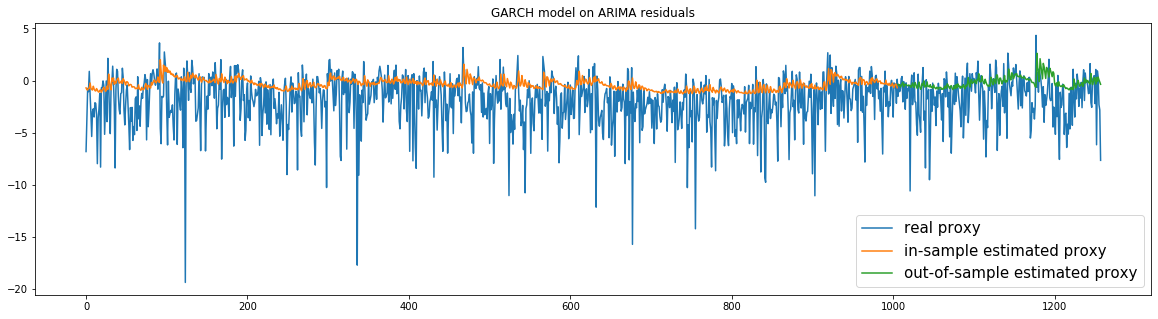

In [37]:
plt.figure(figsize = (20,5))

s=arima_resid_full
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(proxy0,label='real proxy')#real


plt.plot(np.log(best_garch_res.conditional_volatility**2),label='in-sample estimated proxy')


fout_index=np.linspace(len(train_X), len(y_t)-1, num=len(test_X))
plt.plot(fout_index,np.log(vardf),label='out-of-sample estimated proxy')


plt.legend(loc='best', fontsize=15)
plt.title('GARCH model on ARIMA residuals')
axes = plt.gca()
#axes.set_xlim([1180,1200])
#axes.set_ylim([0,5])

In [38]:
s=arima_resid_in
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

proxy00=np.log(best_garch_res.conditional_volatility**2)
#proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))


s=arima_resid_out
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

proxy00=np.log(vardf)
#proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))
#这个是ARIMA 预测的logreturn计算volitility 得到rmse

(2.856035643791412, 8.156939598607025, 2.049043118452375)
(2.6565105675443617, 7.057048395474867, 1.9007577053183333)
